In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline

# Load data

In [2]:
#Read POS_CASH_balance ,application_train and application_test files
pos_data=pd.read_csv('POS_CASH_balance.csv')

app_train  = pd.read_csv('application_train.csv')

app_test = pd.read_csv('application_test.csv')

In [3]:
pos_data.shape

(10001358, 8)

In [4]:
pos_data.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [5]:
pos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


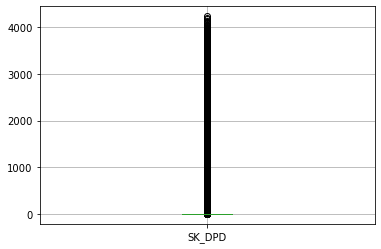

In [6]:
#box-plot for checking the abnormal data
pos_data.boxplot(column=['SK_DPD'])
plt.show()

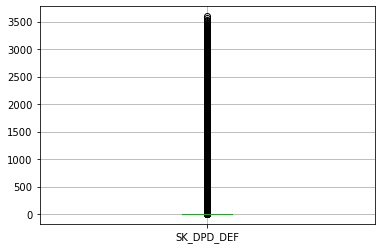

In [7]:
pos_data.boxplot(column=['SK_DPD_DEF'])
plt.show()

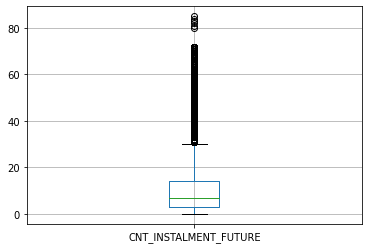

In [8]:
pos_data.boxplot(column=['CNT_INSTALMENT_FUTURE'])
plt.show()

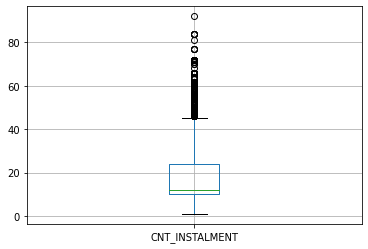

In [9]:
pos_data.boxplot(column=['CNT_INSTALMENT'])
plt.show()

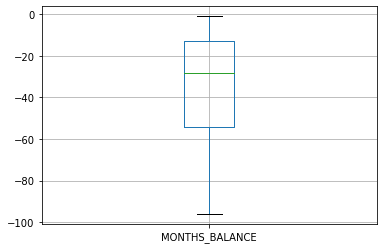

In [10]:
pos_data.boxplot(column=['MONTHS_BALANCE'])
plt.show()

In [11]:
pos_data = pd.get_dummies(pos_data)

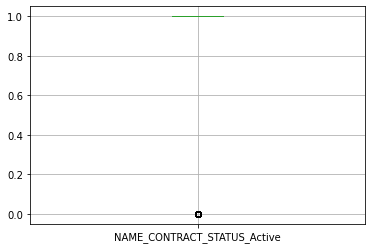

In [12]:
pos_data.boxplot(column=['NAME_CONTRACT_STATUS_Active'])
plt.show()

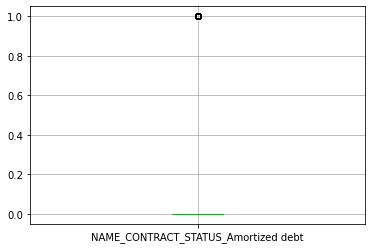

In [13]:
pos_data.boxplot(column=['NAME_CONTRACT_STATUS_Amortized debt'])
plt.show()

In [14]:
#Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
missing_values_table(pos_data)

Your selected dataframe has 16 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


In [16]:
#check the missing data
pos_data.isnull().sum().sort_values(ascending=False)

CNT_INSTALMENT_FUTURE                         26087
CNT_INSTALMENT                                26071
NAME_CONTRACT_STATUS_XNA                          0
NAME_CONTRACT_STATUS_Signed                       0
NAME_CONTRACT_STATUS_Returned to the store        0
NAME_CONTRACT_STATUS_Demand                       0
NAME_CONTRACT_STATUS_Completed                    0
NAME_CONTRACT_STATUS_Canceled                     0
NAME_CONTRACT_STATUS_Approved                     0
NAME_CONTRACT_STATUS_Amortized debt               0
NAME_CONTRACT_STATUS_Active                       0
SK_DPD_DEF                                        0
SK_DPD                                            0
MONTHS_BALANCE                                    0
SK_ID_CURR                                        0
SK_ID_PREV                                        0
dtype: int64

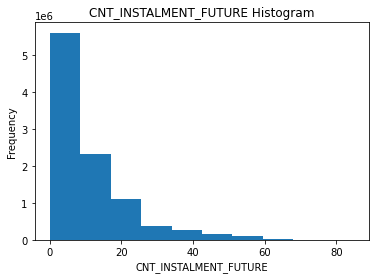

In [17]:
#fill in the median value for the missing data
pos_data['CNT_INSTALMENT_FUTURE'].plot.hist(title="CNT_INSTALMENT_FUTURE Histogram");
plt.xlabel('CNT_INSTALMENT_FUTURE');

median_1=pos_data['CNT_INSTALMENT_FUTURE'].median()
median_1
pos_data['CNT_INSTALMENT_FUTURE'].replace(np.nan,median_1,inplace=True)

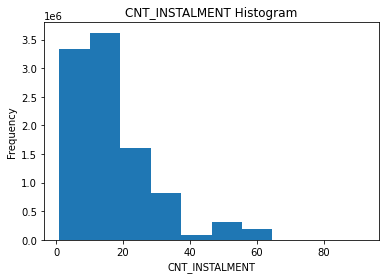

In [18]:
pos_data['CNT_INSTALMENT'].plot.hist(title="CNT_INSTALMENT Histogram");
plt.xlabel('CNT_INSTALMENT');

median_2=pos_data['CNT_INSTALMENT'].median()
median_2
pos_data['CNT_INSTALMENT'].replace(np.nan,median_1,inplace=True)

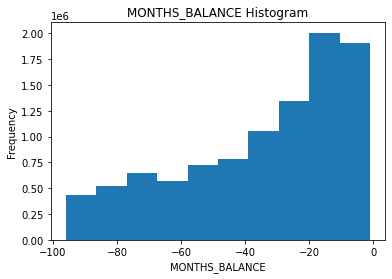

In [19]:
pos_data['MONTHS_BALANCE'].plot.hist(title="MONTHS_BALANCE Histogram");
plt.xlabel('MONTHS_BALANCE');

median_3=pos_data['MONTHS_BALANCE'].median()
median_3
pos_data['MONTHS_BALANCE'].replace(np.nan,median_1,inplace=True)

In [20]:
pos_data['TARGET']=app_train['TARGET']

In [21]:
#pos_data.isnull().sum()
10001358-307511

9693847

In [22]:
pos_data.isnull().sum()

SK_ID_PREV                                          0
SK_ID_CURR                                          0
MONTHS_BALANCE                                      0
CNT_INSTALMENT                                      0
CNT_INSTALMENT_FUTURE                               0
SK_DPD                                              0
SK_DPD_DEF                                          0
NAME_CONTRACT_STATUS_Active                         0
NAME_CONTRACT_STATUS_Amortized debt                 0
NAME_CONTRACT_STATUS_Approved                       0
NAME_CONTRACT_STATUS_Canceled                       0
NAME_CONTRACT_STATUS_Completed                      0
NAME_CONTRACT_STATUS_Demand                         0
NAME_CONTRACT_STATUS_Returned to the store          0
NAME_CONTRACT_STATUS_Signed                         0
NAME_CONTRACT_STATUS_XNA                            0
TARGET                                        9693847
dtype: int64

In [23]:
pos_data = pos_data[pos_data['TARGET'].notna()]

In [24]:
pos_data.isnull().sum()

SK_ID_PREV                                    0
SK_ID_CURR                                    0
MONTHS_BALANCE                                0
CNT_INSTALMENT                                0
CNT_INSTALMENT_FUTURE                         0
SK_DPD                                        0
SK_DPD_DEF                                    0
NAME_CONTRACT_STATUS_Active                   0
NAME_CONTRACT_STATUS_Amortized debt           0
NAME_CONTRACT_STATUS_Approved                 0
NAME_CONTRACT_STATUS_Canceled                 0
NAME_CONTRACT_STATUS_Completed                0
NAME_CONTRACT_STATUS_Demand                   0
NAME_CONTRACT_STATUS_Returned to the store    0
NAME_CONTRACT_STATUS_Signed                   0
NAME_CONTRACT_STATUS_XNA                      0
TARGET                                        0
dtype: int64

In [25]:
# Find correlations with the target and sort
correlations = pos_data.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 SK_ID_CURR                                   -0.000136
SK_DPD                                        0.000050
NAME_CONTRACT_STATUS_Approved                 0.000091
NAME_CONTRACT_STATUS_Returned to the store    0.000401
NAME_CONTRACT_STATUS_Active                   0.000472
CNT_INSTALMENT                                0.001282
NAME_CONTRACT_STATUS_Demand                   0.001540
NAME_CONTRACT_STATUS_Signed                   0.002050
SK_ID_PREV                                    0.002164
CNT_INSTALMENT_FUTURE                         0.002734
MONTHS_BALANCE                                0.002775
TARGET                                        1.000000
NAME_CONTRACT_STATUS_Amortized debt                NaN
NAME_CONTRACT_STATUS_Canceled                      NaN
NAME_CONTRACT_STATUS_XNA                           NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 SK_DPD_DEF                                   -0.001362
NAME_CONTRACT_STATUS_Completed  